In [25]:
# Data Loading & Exploration

import pandas as pd

# Load dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview structure
print("Columns:", df.columns.tolist())
df.head()


Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [26]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(20)


weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_absolute       416024
weekly_hosp_admissions_per_million         404938
weekly_hosp_admissions                     404938
icu_patients                               390319
icu_patients_per_million                   390319
hosp_patients_per_million                  388779
hosp_patients                              388779
total_boosters_per_hundred                 375835
total_boosters                             375835
new_vaccinations                           358464
new_tests                                  354032
new_tests_per_thousand                     354032
people_fully_vaccinated                    351374
people_fully_vaccinated_per_hundred        351374
total_tests                                350048


In [27]:
# data cleaning

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter countries of interest
countries = ['United States', 'India', 'Brazil', 'Italy', 'Kenya']
df = df[df['location'].isin(countries)]

# Sort by country and date
df.sort_values(['location', 'date'], inplace=True)

# Fill missing values in key metrics
cols_to_fill = ['total_cases', 'new_cases', 'total_deaths', 'total_vaccinations']
df[cols_to_fill] = df[cols_to_fill].fillna(0)

# Confirm cleanup
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50234,BRA,South America,Brazil,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50235,BRA,South America,Brazil,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50236,BRA,South America,Brazil,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50237,BRA,South America,Brazil,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50238,BRA,South America,Brazil,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN


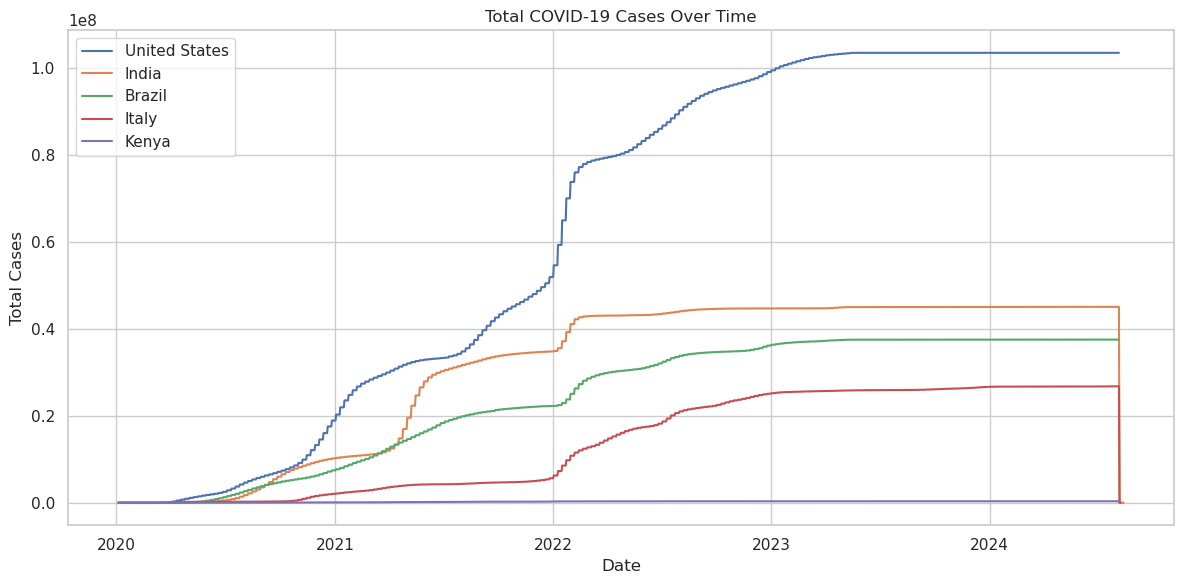

In [28]:
import matplotlib.pyplot as plt

# Total COVID-19 Cases Over Time
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


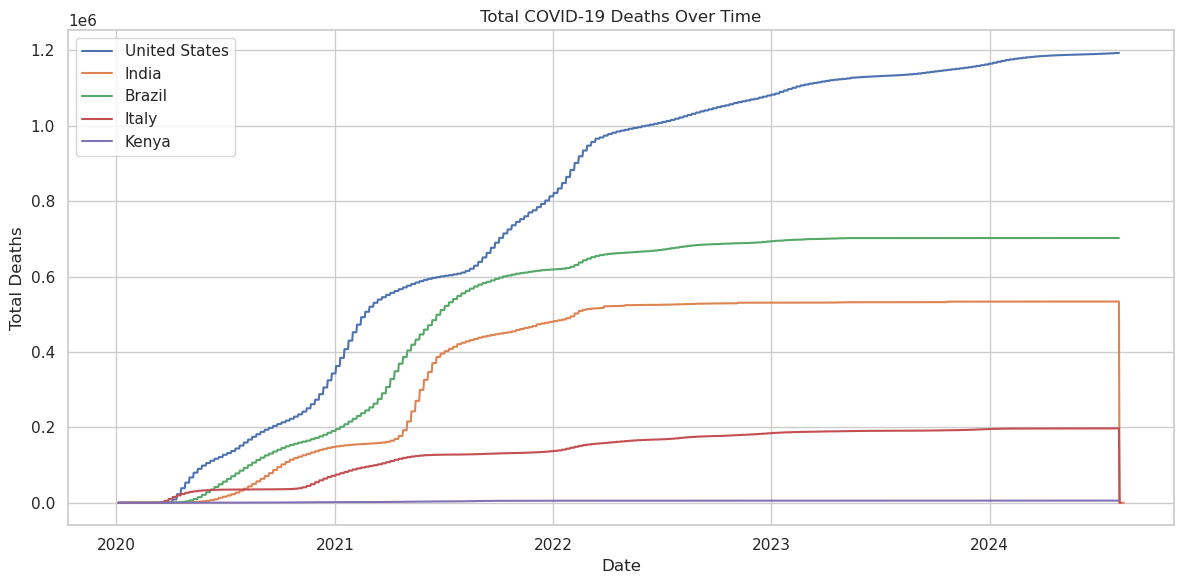

In [29]:
# Total COVID-19 Deaths Over Time
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


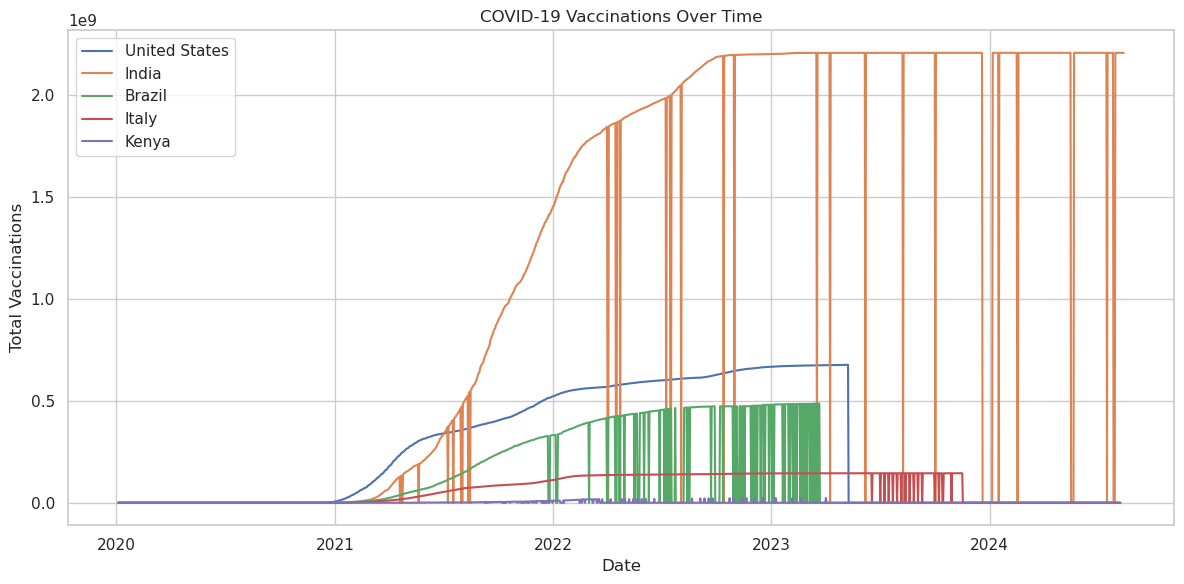

In [30]:
# vaccination Progress
# Total COVID-19 Vaccinations Over Time
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)
plt.title('COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


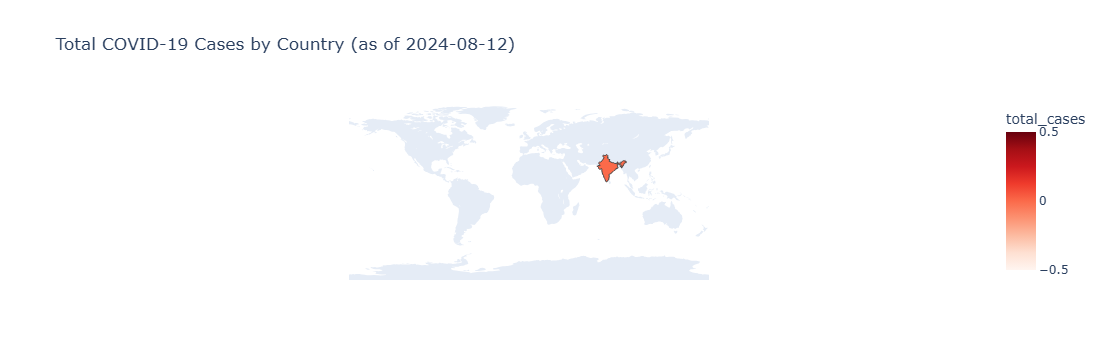

In [32]:
# Choropleth Map: Total Cases by Country

# install ploty first
!pip install plotly


import plotly.express as px
import pandas as pd

# Make sure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Get the latest data for each country
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]

# Keep only necessary columns and drop aggregate entries
choropleth_df = latest_df[['iso_code', 'location', 'total_cases']]
choropleth_df = choropleth_df[(choropleth_df['iso_code'].str.len() == 3)]  # Remove non-country entries

# Plot Choropleth
fig = px.choropleth(
    choropleth_df,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title=f'Total COVID-19 Cases by Country (as of {latest_date.date()})'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


In [ ]:
### Key Insights

1. The United States and India reported the highest cumulative cases and deaths.
2. Vaccination efforts accelerated significantly in 2021.
3. Kenya, while lower in absolute numbers, showed consistent increases in cases and vaccinations.
4. Italy had a high early death toll but strong vaccination growth.
5. Brazil saw an early rise in deaths and cases before stabilizing.

### Tools Used:
- `pandas`
- `matplotlib`
- `Jupyter Notebook`
